In [220]:
import numpy as np 
import matplotlib.pyplot as plt
import random as rd

In [221]:
# def funcloc(x):
#     return 4 + x**3/4-x**2+x-2*x**4+2*x**5
# def funcscale(x):
#     return x**3/2 + 4 + x**2 - x

In [222]:
locs = {0: 2, 1: -2, 2: -1, 3: 0, 4: 3, 5: 4, 6: 1, 7: 1, 8: 5, 9: 4}
scales = {0: 4, 1: 5, 2: 6, 3: 7, 4: 2, 5: 5, 6: 3, 7: 2, 8: 8, 9: 6}

def funcloc(x):
    return locs[x]
def funcscale(x):
    return scales[x]

In [223]:
def reward_function(x: int) -> np.array:
    return np.random.normal(loc=funcloc(x), scale=funcscale(x))

In [224]:
def softmax(preferencies):
    return np.exp(preferencies) / np.sum(np.exp(preferencies))

In [225]:
def update_preferencies(preferencies, action_rewards, action_numbers, action, reward, alpha):
    softmax_preferencies = softmax(preferencies)
    for i in range(len(preferencies)):
        if action_rewards[i] == 0:
            continue
        if i == action:
            preferencies[i] += alpha * (reward - np.sum(action_rewards) / np.sum(action_numbers)) * (1 - softmax_preferencies[i])
        else:
            preferencies[i] -= alpha * (reward - np.sum(action_rewards) / np.sum(action_numbers)) * softmax_preferencies[i]
    return preferencies

In [226]:
def eps_greedy(epsilon, H) -> int:
    p = softmax(H)
    i: float = np.argmax(p)

    dim = np.size(H)
    action_space = range(0,dim,1)
    if rd.random() <= 1 - epsilon:
        return i
    else:
       np.delete(action_space,i)
       return np.random.choice(action_space)

In [227]:
def multiarmedbandit(max_iter, arms, epsilon, T, step_size):
    total_rewards = [0 for _ in range(T)]
    for i in range(max_iter):
        action_preferences = np.zeros(shape=arms)
        action_number = np.zeros(shape=arms)
        action_rewards = np.zeros(shape=arms)
        for j in range(T):
            action = eps_greedy(epsilon, action_preferences)
            reward = reward_function(action)
            action_preferences = update_preferencies(action_preferences, action_rewards, action_number, action, reward, step_size)
            action_rewards[action] += reward
            action_number[action] += 1
            total_rewards[j] += reward
    total_rewards = np.array(total_rewards) / max_iter
    return total_rewards
        

In [233]:
max_iter = 1000
T = 200
epsilon = 0.1
arms = 10

step_size = 0.8
step_08 = multiarmedbandit(max_iter, arms, epsilon, T, step_size)

step_size = 0.1
step_01 = multiarmedbandit(max_iter, arms, epsilon, T, step_size)



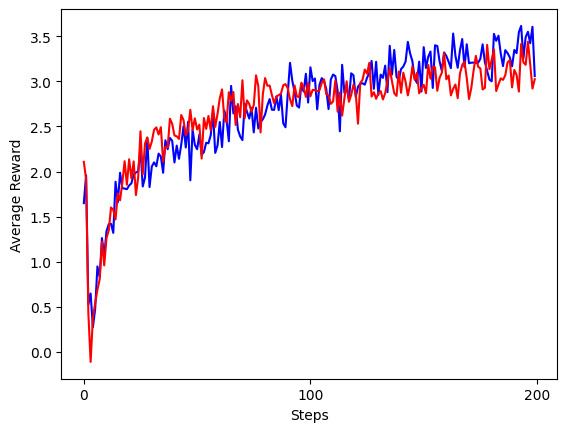

In [234]:
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.plot(step_08, color='b')
plt.plot(step_01, color='r')
plt.xticks(np.arange(0,T+1,100))
plt.show()